In [1]:
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


In [2]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

# save dataset to csv files
data = X
data['target'] = y
data.to_csv(os.path.join(r"D:\Heart_Disease_Project\data", "heart_disease_data.csv"), index=False)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [3]:
data = pd.read_csv(r"D:\Heart_Disease_Project\data\heart_disease_data.csv")
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [6]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [7]:
# split data into features and target
X = data.drop(columns=['target'])
y = data['target']

In [8]:
# Standardize numerical features StandardScaler
scaler = StandardScaler()
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
data[numerical_features] = scaler.fit_transform(X[numerical_features])

In [9]:
print ( data.head() )  # Display the first few rows of the dataset
print ( data.info() ) # Display information about the dataset

        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.948726  0.686202 -2.251775  0.757525 -0.264900  2.394438  1.016684   
1  1.392002  0.686202  0.877985  1.611220  0.760415 -0.417635  1.016684   
2  1.392002  0.686202  0.877985 -0.665300 -0.342283 -0.417635  1.016684   
3 -1.932564  0.686202 -0.165268 -0.096170  0.063974 -0.417635 -0.996749   
4 -1.489288 -1.457296 -1.208521 -0.096170 -0.825922 -0.417635  1.016684   

    thalach     exang   oldpeak     slope        ca      thal  target  
0  0.017197 -0.696631  1.087338  2.274579 -0.718306  0.653650       0  
1 -1.821905  1.435481  0.397182  0.649113  2.487269 -0.895552       2  
2 -0.902354  1.435481  1.346147  0.649113  1.418744  1.170051       1  
3  1.637359 -0.696631  2.122573  2.274579 -0.718306 -0.895552       0  
4  0.980537 -0.696631  0.310912 -0.976352 -0.718306 -0.895552       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column 

In [10]:
data= pd.concat([X, y], axis=1)

In [11]:
# check for null values
print(data.isnull().sum())  

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [12]:
# remove null values
data = data.dropna()

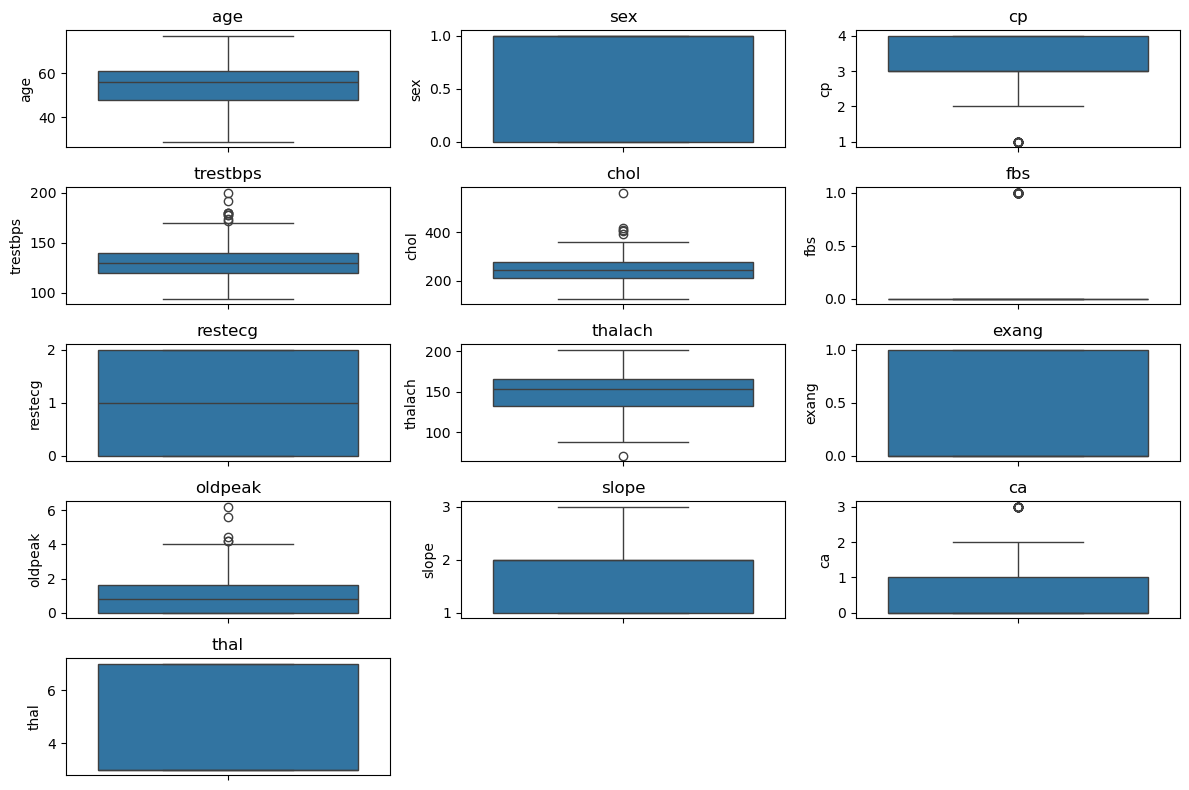

In [13]:
# check for outliers using box plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(data[column])
    plt.title(column)
    plt.tight_layout()

In [14]:
# remove outliers
for column in numerical_features:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [15]:
data.head()  # Display the first few rows of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


In [16]:
# remove fbs column
if 'fbs' in data.columns:
    data = data.drop(columns=['fbs'])

In [17]:
data.info()  # Display information about the dataset after preprocessing

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 2 to 301
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   restecg   212 non-null    int64  
 6   thalach   212 non-null    int64  
 7   exang     212 non-null    int64  
 8   oldpeak   212 non-null    float64
 9   slope     212 non-null    int64  
 10  ca        212 non-null    float64
 11  thal      212 non-null    float64
 12  target    212 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 23.2 KB


In [18]:
# Save the preprocessed data
data.to_csv(os.path.join(r"D:\Heart_Disease_Project\data", "heart_disease_preprocessed.csv"), index=False)

# Exploratory Data Analysis (EDA) 

In [19]:
data.corr()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.066700,0.186479,0.254679,0.176429,0.140488,-0.405933,0.159010,0.230390,0.145055,0.411836,0.207548,0.229507
sex,-0.066700,1.000000,0.149613,-0.007833,-0.091126,0.045827,-0.114762,0.215401,0.201976,0.017982,0.116153,0.449787,0.332565
cp,0.186479,0.149613,1.000000,0.043110,-0.009620,0.152190,-0.387646,0.445646,0.313715,0.212734,0.277174,0.380046,0.437975
trestbps,0.254679,-0.007833,0.043110,1.000000,0.129574,0.133511,-0.021997,0.013225,0.153811,0.023341,0.016754,0.114309,0.108644
chol,0.176429,-0.091126,-0.009620,0.129574,1.000000,0.099827,0.010402,0.022671,-0.025048,-0.078007,0.112570,-0.008411,-0.018897
restecg,0.140488,0.045827,0.152190,0.133511,0.099827,1.000000,-0.077180,0.082809,0.144367,0.127334,0.115192,0.023517,0.213996
thalach,-0.405933,-0.114762,-0.387646,-0.021997,0.010402,-0.077180,1.000000,-0.483022,-0.398936,-0.433401,-0.301200,-0.415064,-0.457652
exang,0.159010,0.215401,0.445646,0.013225,0.022671,0.082809,-0.483022,1.000000,0.361696,0.312756,0.235697,0.392167,0.422473
oldpeak,0.230390,0.201976,0.313715,0.153811,-0.025048,0.144367,-0.398936,0.361696,1.000000,0.525254,0.355646,0.337845,0.544418
slope,0.145055,0.017982,0.212734,0.023341,-0.078007,0.127334,-0.433401,0.312756,0.525254,1.000000,0.138754,0.216593,0.392326


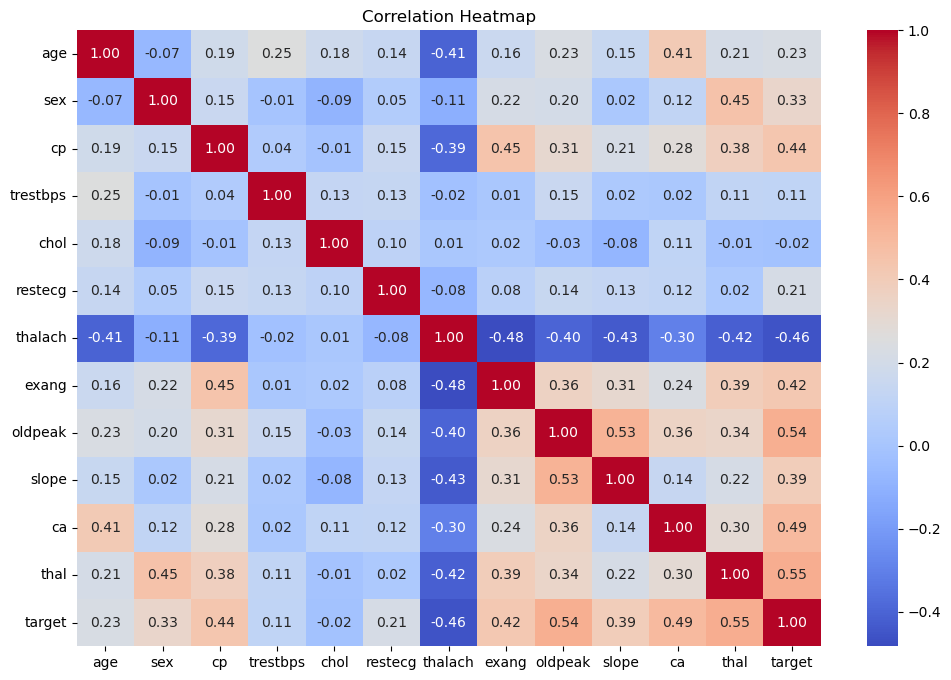

In [20]:
# heat map

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

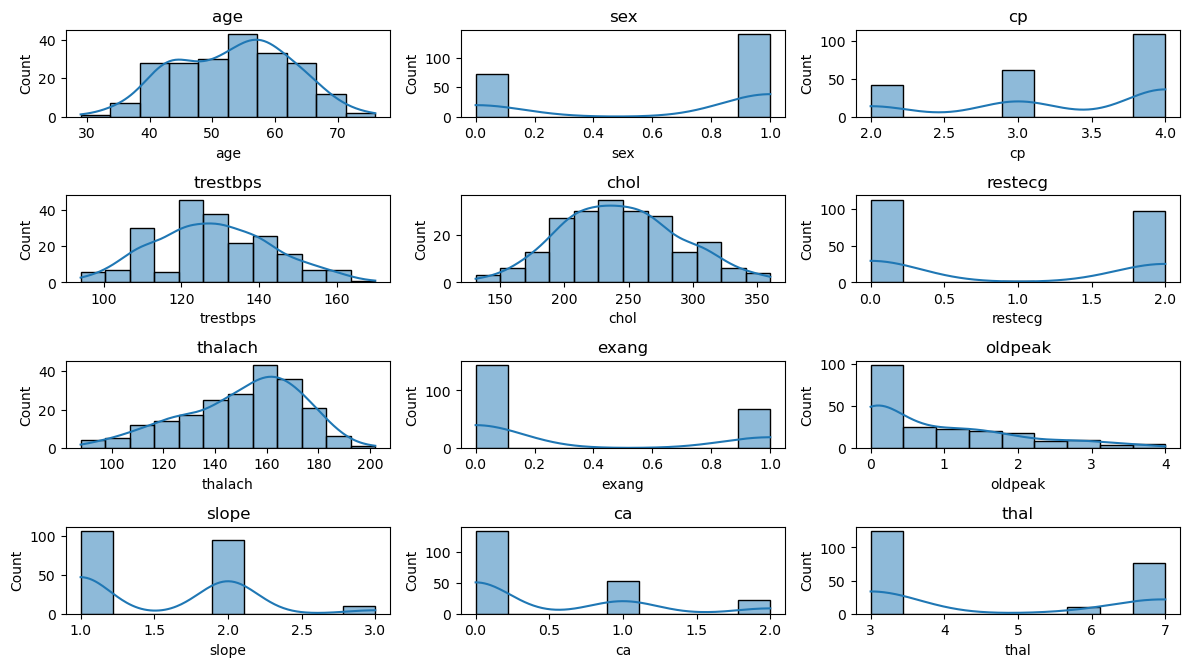

In [21]:
# Remove columns from numerical_features that are not in data.columns
current_numerical_features = [col for col in numerical_features if col in data.columns]

# Draw histograms for numerical features
plt.figure(figsize=(12, 8))
for i, column in enumerate(current_numerical_features, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(column)
    plt.tight_layout()
plt.show()

In [22]:
# Draw pair plots
if 'num' in data.columns:
    sns.pairplot(data, hue='num', diag_kind='kde', markers=["o", "s"])
    plt.show()

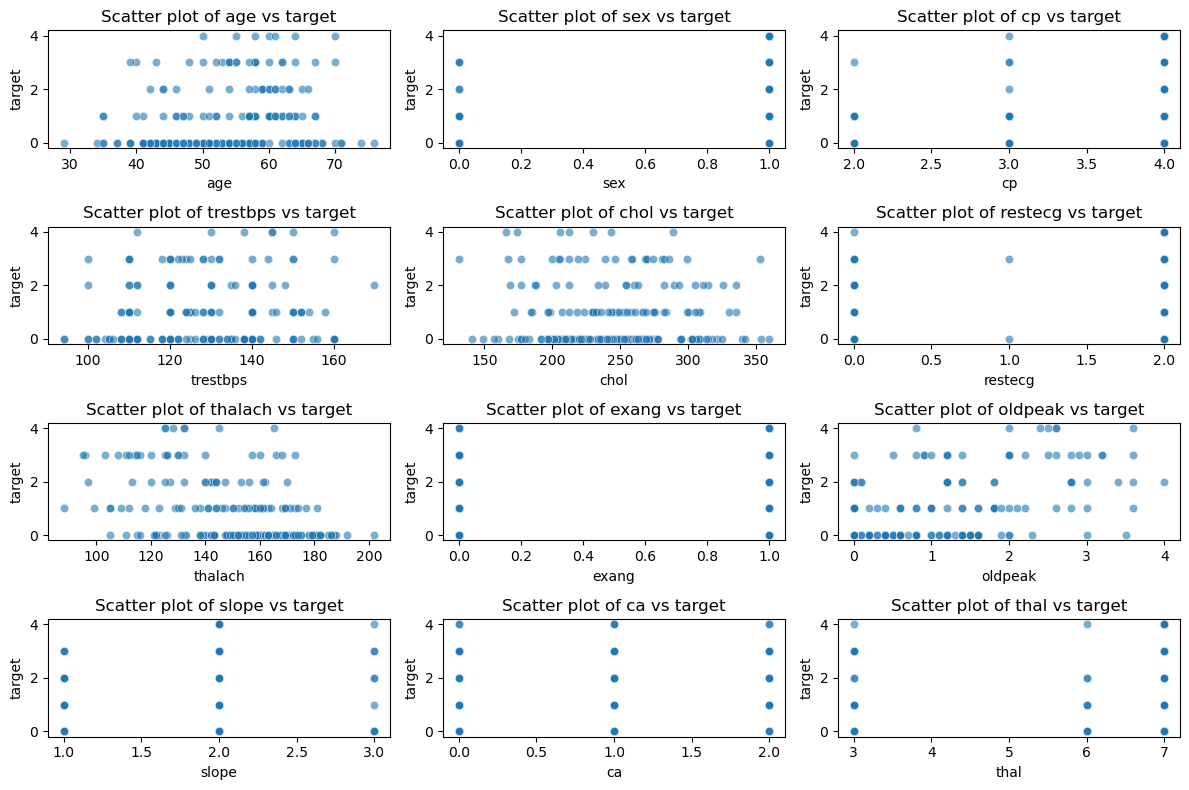

In [24]:
# Draw scatter plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(current_numerical_features, 1):
    if column != 'target':
        plt.subplot(4, 3, i)
        sns.scatterplot(x=data[column], y=data['target'], alpha=0.6)
        plt.title(f'Scatter plot of {column} vs target')
        plt.xlabel(column)
        plt.ylabel('target')
        plt.tight_layout()
plt.show()